In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
images = [] # liste pour stocker toutes les images
labels = [] # liste pour stocker les labels de chaque image

dataset_directory = "images"

for breed in os.listdir(dataset_directory):
    breed_directory = os.path.join(dataset_directory, breed)
    if os.path.isdir(breed_directory):
        for image_filename in os.listdir(breed_directory):
            img = cv2.imread(os.path.join(breed_directory, image_filename))
            if img is not None:
                images.append(img)
                labels.append(breed)

In [3]:
len(images)

1919

In [4]:
labels = np.array(labels)
np.unique(labels)

array(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel',
       'n02085936-Maltese_dog', 'n02086079-Pekinese',
       'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel',
       'n02086910-papillon', 'n02087046-toy_terrier',
       'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'],
      dtype='<U29')

In [5]:
#Redimensionnement des images

image_size = (224, 224) # Vous pouvez choisir une autre taille

images = [cv2.resize(img, image_size) for img in images]

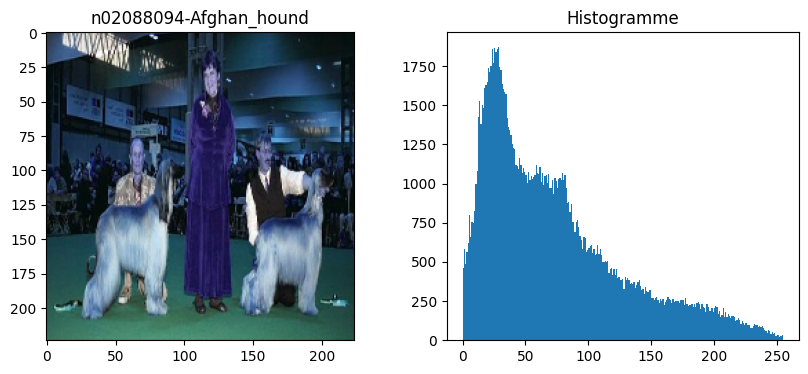

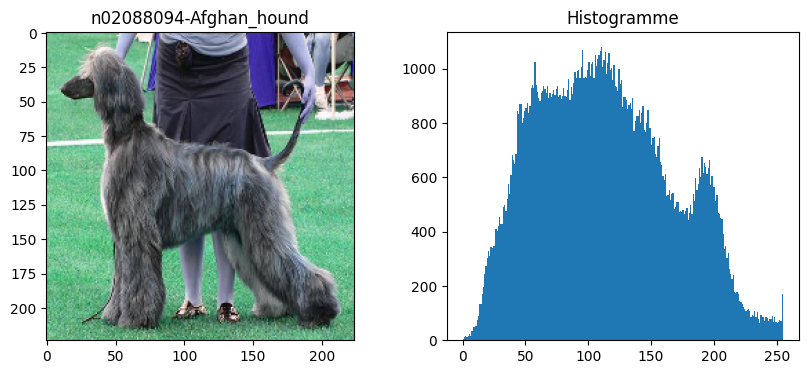

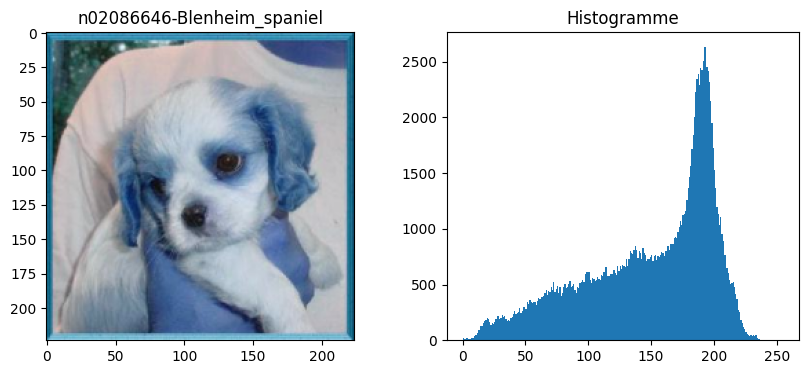

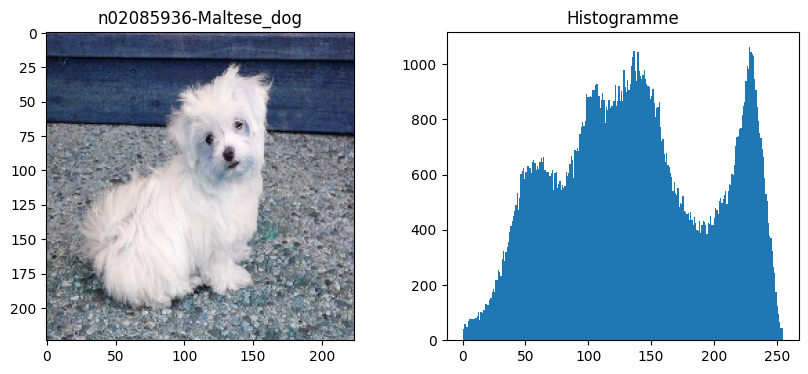

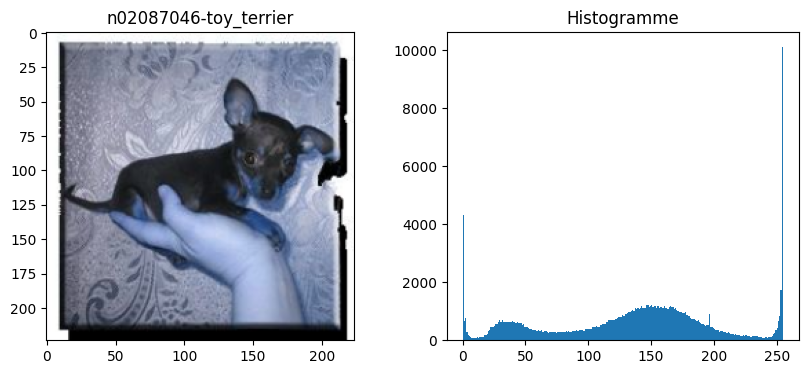

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Choisis un index au hasard dans le jeu de données
index = np.random.choice(np.arange(len(images)), size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.title('Histogramme')
    
    plt.show()

In [7]:
#Normalisation des images

for i in range(len(images)):
    images[i] = images[i] / 255.0

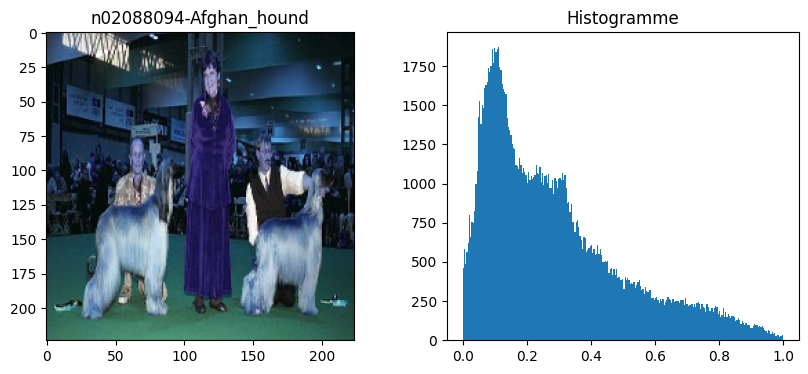

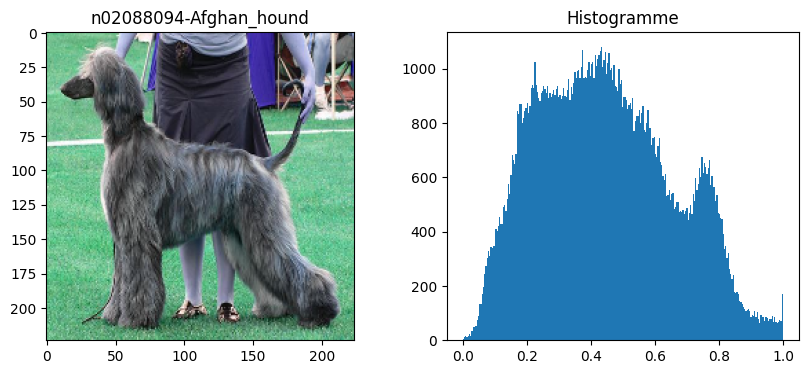

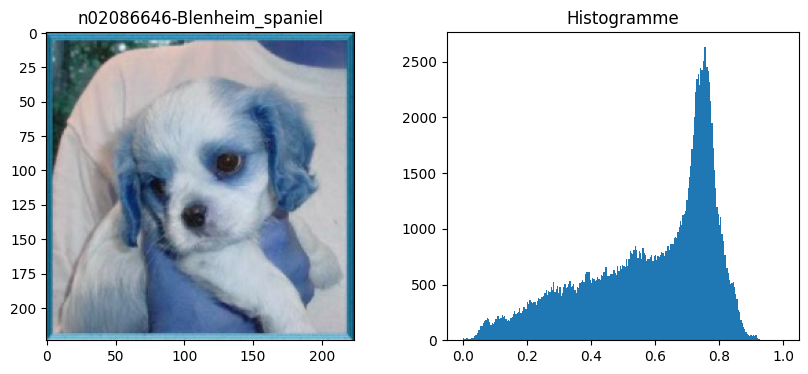

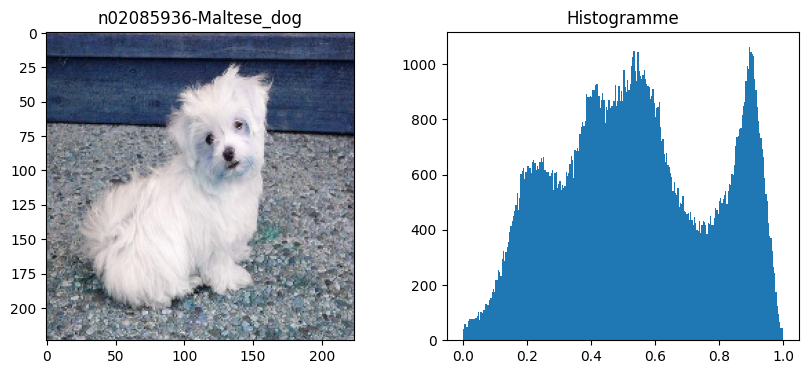

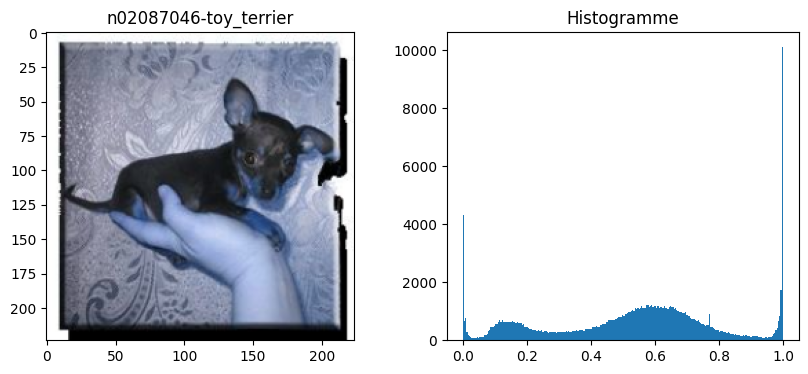

In [8]:
def display_images_and_histograms(images, labels, indices):
    """
    Affiche les images et leurs histogrammes correspondants.

    Parameters:
    - images : une liste d'images.
    - labels : une liste de labels correspondant aux images.
    - indices : une liste d'indices des images à afficher.
    """

    for i in indices:
        img = images[i]
        label = labels[i]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(label)

        plt.subplot(1, 2, 2)
        n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
        plt.title('Histogramme')

        plt.show()

display_images_and_histograms(images, labels, index)

In [9]:
from PIL import Image, ImageOps

def apply_autocontrast(image):
    """
    Applique l'autocontraste à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec autocontraste appliqué.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'autocontraste
    autocontrasted_image = ImageOps.autocontrast(pil_image)

    # Convertir l'image PIL en tableau numpy
    autocontrasted_image = np.array(autocontrasted_image) / 255.0

    return autocontrasted_image

# Appliquer l'autocontraste à toutes les images
images = [apply_autocontrast(img) for img in images]


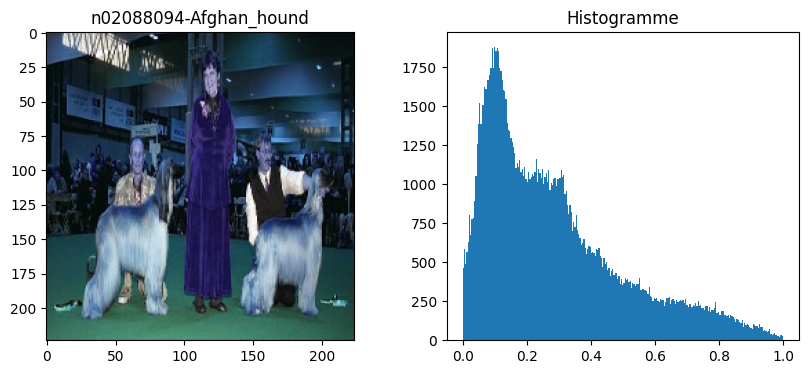

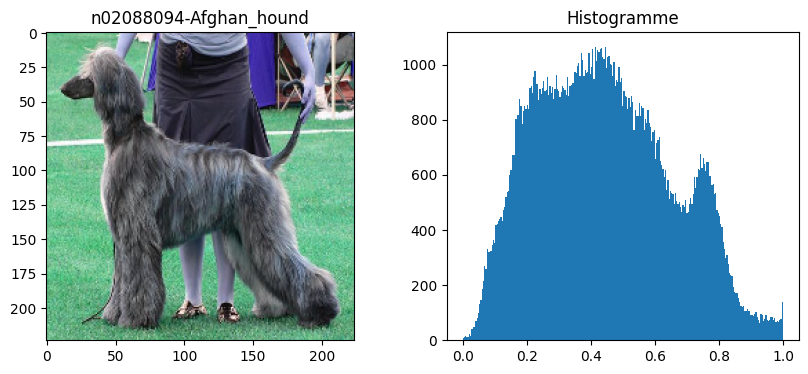

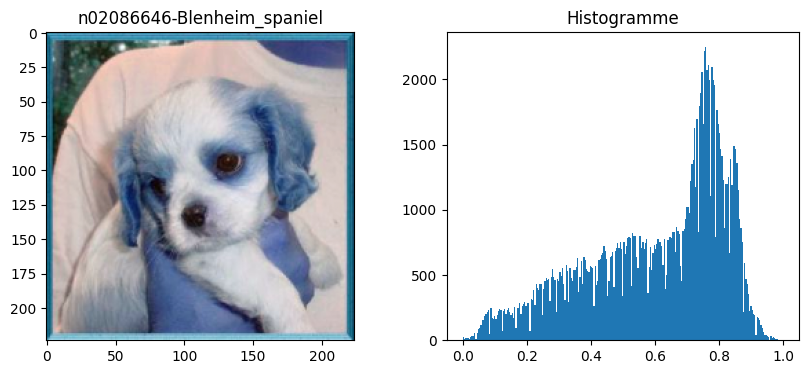

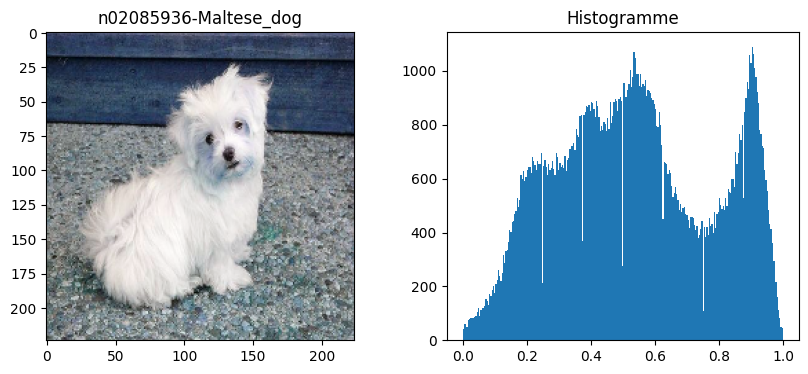

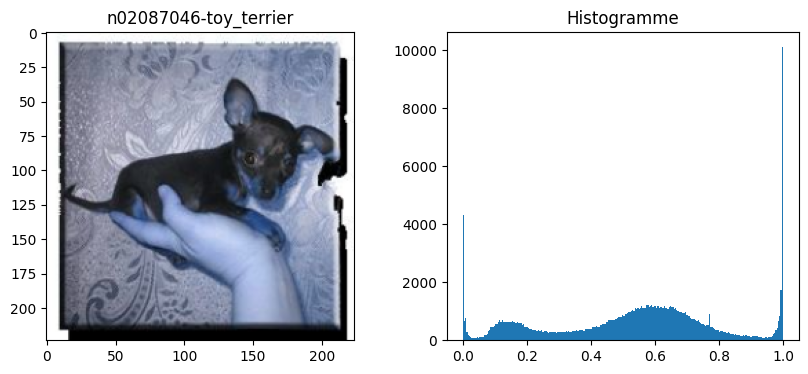

In [10]:
display_images_and_histograms(images, labels, index)

In [11]:
def apply_equalization(image):
    """
    Applique l'égalisation d'histogramme à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec égalisation d'histogramme appliquée.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'égalisation d'histogramme
    equalized_image = ImageOps.equalize(pil_image)

    # Convertir l'image PIL en tableau numpy
    equalized_image = np.array(equalized_image) / 255.0

    return equalized_image

# Appliquer l'égalisation d'histogramme à toutes les images
images = [apply_equalization(img) for img in images]

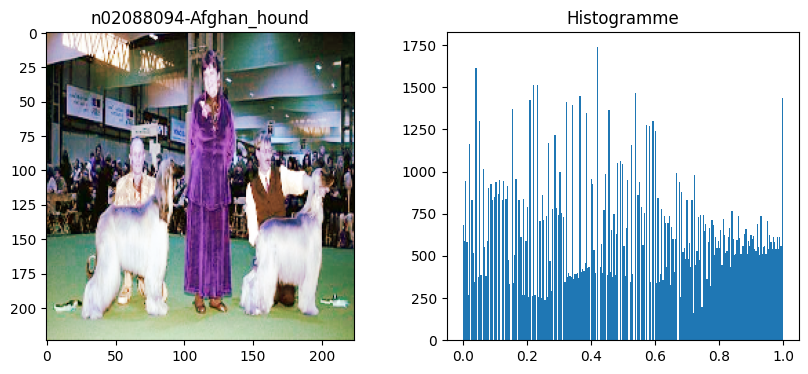

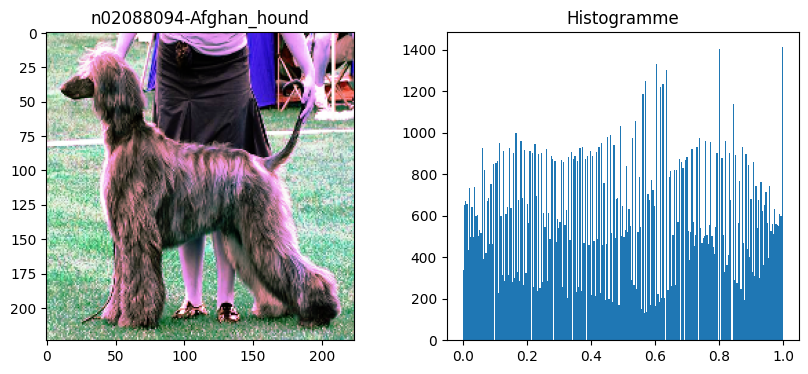

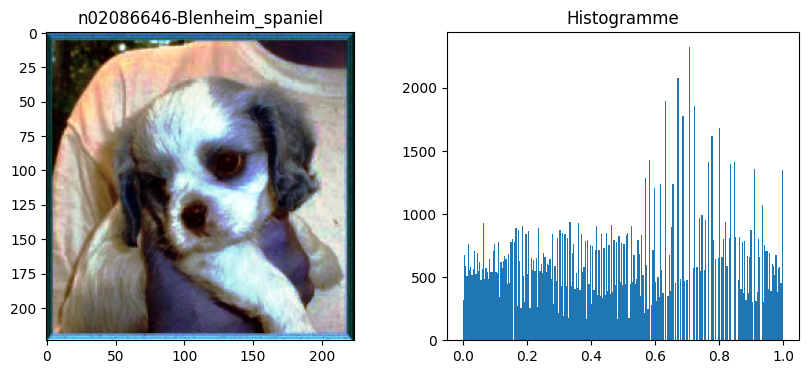

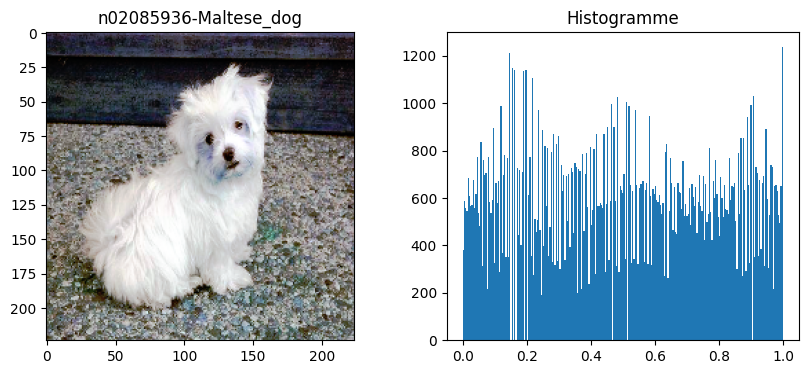

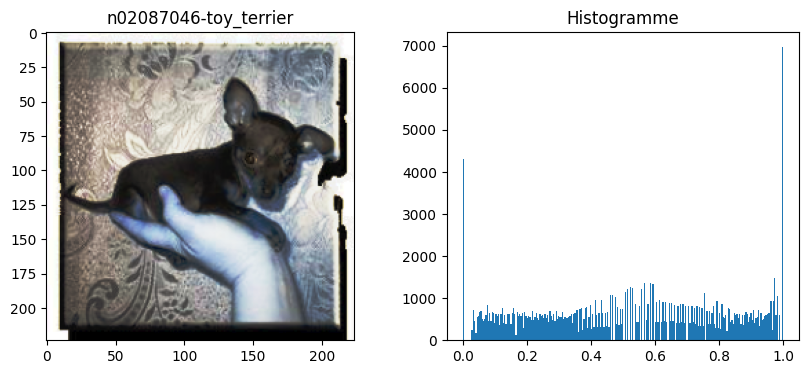

In [12]:
display_images_and_histograms(images, labels, index)

In [13]:
from skimage.restoration import denoise_nl_means
from skimage import img_as_float

def apply_nl_means_denoising(image):
    """
    Applique le débruitage NL-means à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec le débruitage NL-means appliqué.
    """

    # Convertir l'image en format float
    image_float = img_as_float(image)

    # Appliquer le débruitage NL-means
    denoised_image = denoise_nl_means(image_float, h=0.08, fast_mode=True, 
                                      patch_size=5, patch_distance=3, channel_axis=-1)

    return denoised_image

# Appliquer le débruitage NL-means à toutes les images
images = [apply_nl_means_denoising(img) for img in images]


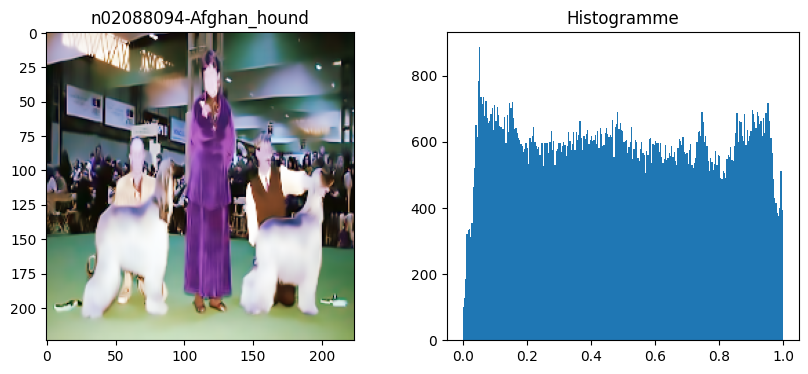

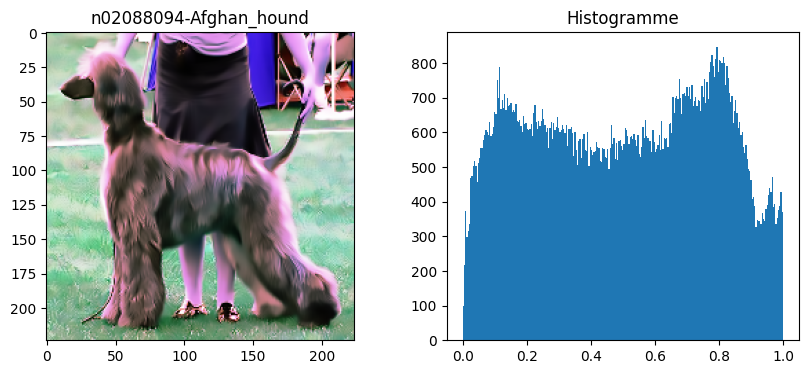

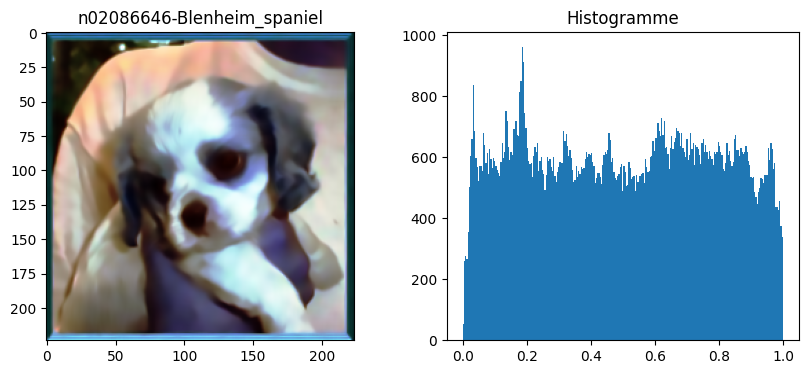

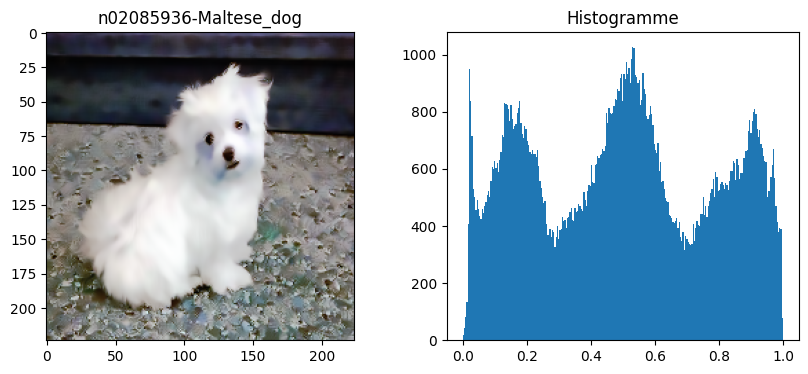

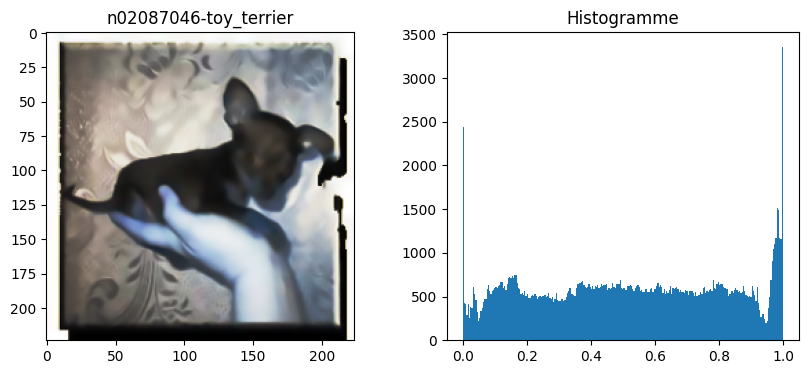

In [14]:
display_images_and_histograms(images, labels, index)

In [15]:
def apply_cropping(image):
    """
    Applique un recadrage au centre de l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image recadrée.
    """
    width, height, _ = image.shape
    new_width = new_height = min(width, height)
    left = int((width - new_width)/2)
    top = int((height - new_height)/2)
    right = int((width + new_width)/2)
    bottom = int((height + new_height)/2)

    image = image[left:right, top:bottom]
    return image

def apply_mirror(image):
    """
    Applique une symétrie à l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image symétrisée.
    """
    return np.flip(image, axis=1)

# Appliquer le recadrage et le mirroring à toutes les images
images = [apply_cropping(img) for img in images]

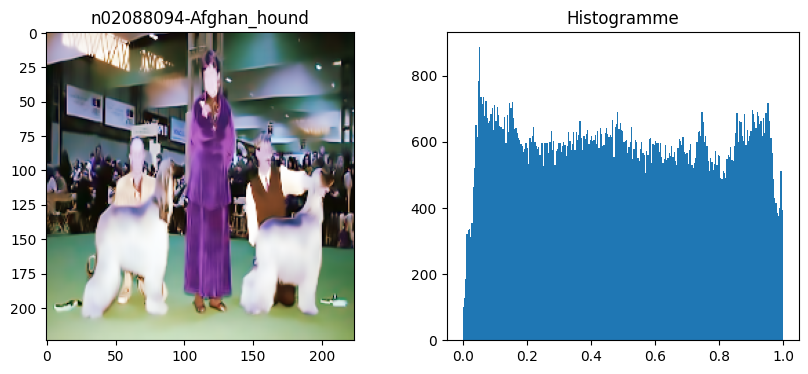

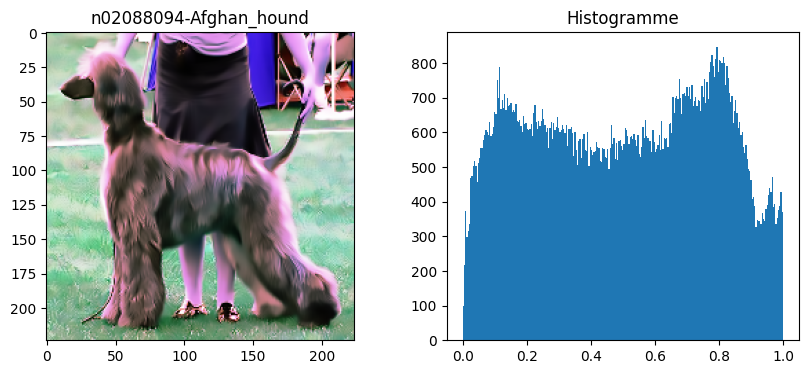

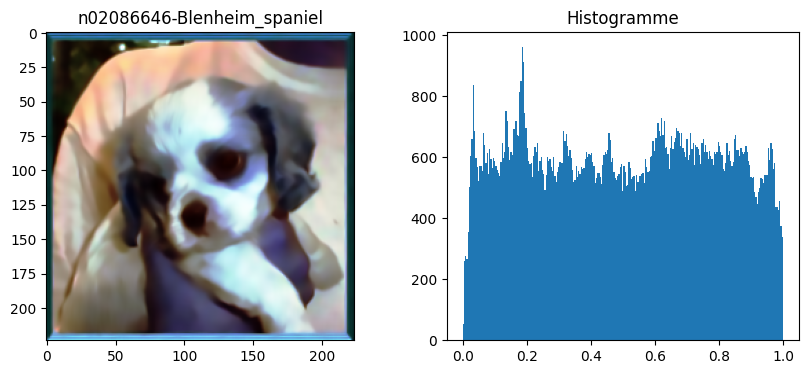

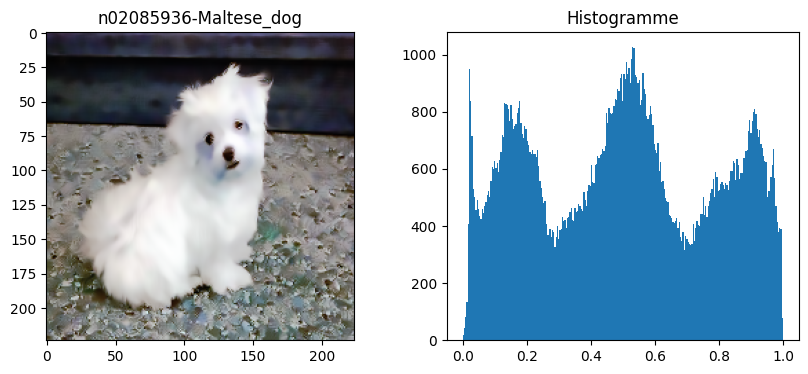

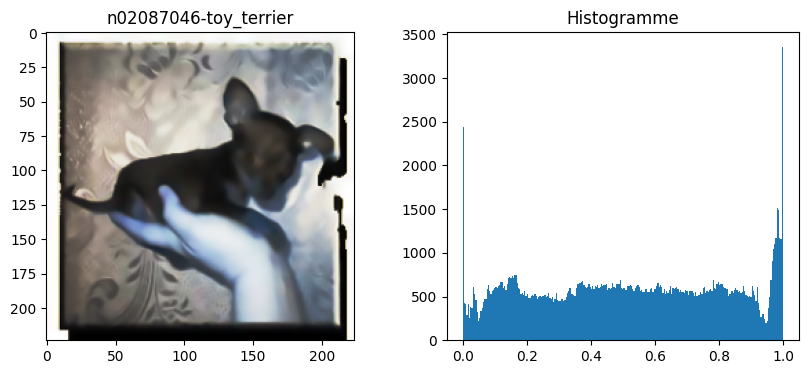

In [16]:
display_images_and_histograms(images, labels, index)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images augmentées
datagen = ImageDataGenerator(
    rotation_range=20,      # plage de degrés pour les rotations aléatoires
    width_shift_range=0.1,  # plage de décalage aléatoire en largeur, en fractions de la largeur totale
    height_shift_range=0.1, # plage de décalage aléatoire en hauteur, en fractions de la hauteur totale
    shear_range=0.1,        # plage de cisaillement aléatoire
    zoom_range=0.1,         # plage de zoom aléatoire
    horizontal_flip=True,   # active le retournement horizontal aléatoire
    fill_mode='nearest'     # mode de remplissage pour les pixels hors des frontières d'entrée
)

# Convertir les listes d'images et de labels en arrays numpy pour l'entraînement
images = np.array(images)
labels = np.array(labels)

# Ajuster le générateur de données sur vos données
datagen.fit(images)

2023-05-29 18:56:25.188602: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-29 18:56:25.235340: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 18:56:25.422226: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-29 18:56:25.422883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 18:56:26.096076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [ ]:
# Convertir images et labels en listes
images = images.tolist()
labels = labels.tolist()

# Combien d'images augmentées nous voulons générer pour chaque image dans notre ensemble de données original
augmentations_per_image = 4

# Pour chaque image dans notre ensemble de données original
for i in range(len(images)):
    # Obtenir l'image et le label
    image = images[i]
    label = labels[i]

    # Reshape l'image pour qu'elle ait 4 dimensions (batch_size, height, width, channels)
    image = image.reshape((1,) + image.shape)

    # Pour chaque augmentation que nous voulons générer
    for j in range(augmentations_per_image):
        # Générer une image augmentée
        for augmented_image in datagen.flow(image, batch_size=1):
            # Ajouter l'image augmentée à notre ensemble de données
            images.append(augmented_image[0])
            labels.append(label)

            # Nous utilisons 'break' ici parce que le générateur de données
            # loop indéfiniment et nous voulons seulement une image par boucle
            break

# Convertir les listes en numpy arrays
images = np.array(images)
labels = np.array(labels)

: 

: 

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encodage des labels en entiers puis en catégories one-hot
le = LabelEncoder()
labels_integer = le.fit_transform(labels)
labels_categorical = to_categorical(labels_integer)

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(np.unique(labels)) # Compte le nombre unique de classes/races de chiens

model = Sequential()

# Bloc 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc entièrement connecté
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # Couche de sortie

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
48/48 [==============================] - 285s 6s/step - loss: 2.3838 - accuracy: 0.1094 - val_loss: 2.2880 - val_accuracy: 0.1536
Epoch 2/10
48/48 [==============================] - 286s 6s/step - loss: 2.2938 - accuracy: 0.1212 - val_loss: 2.2868 - val_accuracy: 0.1224
Epoch 3/10
48/48 [==============================] - 284s 6s/step - loss: 2.2939 - accuracy: 0.1179 - val_loss: 2.2844 - val_accuracy: 0.1224
Epoch 4/10
48/48 [==============================] - 277s 6s/step - loss: 2.2938 - accuracy: 0.1225 - val_loss: 2.2841 - val_accuracy: 0.1536
Epoch 5/10
48/48 [==============================] - 279s 6s/step - loss: 2.2928 - accuracy: 0.1199 - val_loss: 2.2849 - val_accuracy: 0.1224
Epoch 6/10
48/48 [==============================] - 281s 6s/step - loss: 2.2929 - accuracy: 0.1205 - val_loss: 2.2864 - val_accuracy: 0.1536
Epoch 7/10
48/48 [==============================] - 279s 6s/step - loss: 2.2927 - accuracy: 0.1218 - val_loss: 2.2860 - val_accuracy: 0.1536
Epoch 8/10
48

In [ ]:
"""#Save model
model.save('models/model_VGG.h5')"""

In [ ]:
#load model

from tensorflow.keras.models import load_model

model_vgg = load_model('models/model_VGG.h5')

In [ ]:
score = model_vgg.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.286034345626831
Test accuracy: 0.1536458283662796


In [ ]:
import matplotlib.pyplot as plt

# Afficher les courbes de loss et d'accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>